# CSCN8010 Lab 7 - Performance Metrics for Classification Problems

#### This lab aims to create a model that can accurately classify handwritten digits from the MNIST dataset. We'll start by looking at the data and understanding what it looks like using pictures and graphs. Then, we'll choose how many different digits we want our model to recognize, maybe from 3 to 10. After that, we'll split our data into groups for training, checking, and final testing. Next, we'll pick a type of model and teach it how to recognize the digits using the training data. Once trained, we'll check how well it's doing by asking it to classify some digits it hasn't seen before. We'll measure how many it gets right, how many it gets wrong, and some other important things like how sure it is about its answers. We'll also try to make it better at recognizing certain digits without making it learn everything all over again. Finally, we'll give it a big test to see how good it really is at recognizing digits in general. By doing all this, we hope to make a model that can be helpful in understanding and classifying handwritten digits effectively.

#### The MNIST dataset is a collection of 70,000 28x28 pixel grayscale images of handwritten digits (0-9), split into 60,000 training images and 10,000 testing images. It's commonly used to benchmark machine learning algorithms and serves as a beginner-friendly resource for learning about image classification.

#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

### Loading and Exploring MNIST data

#### We will be using fetch_openml() method to download data from openml.org. Using this notebook as refrernce: [Performance Metrics for Classification](https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/classification-performance-metrics/performance_metrics_for_classification.ipynb)

In [2]:
# Downloading dataset
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [3]:
# Checking shape of data
mnist.data.shape

(70000, 784)

In [4]:
# Cheking shape of target
mnist.target.shape

(70000,)

In [5]:
# Printing feature names
print(mnist.feature_names)

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

#### If we are creating a dataframe, we can use these feature_names as column names for that dataframe using:
- df=pd.DataFrame(mnist.data, columns = mnist.feature_names)

In [6]:
# Printing mnist data details
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '2',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

> mnist.details shows details about version, certificate and other relavant details about mnist dataset.

In [7]:
# Printing description of MNIST data
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

> Here we get a note from collaborators of MNIST dataset about the dataset

#### Plotting the 9 random digits from dataset

We will be plotting 16 random digits from the MNIST dataset. Using this notebook as refrernce: [Performance Metrics for Classification](https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/classification-performance-metrics/performance_metrics_for_classification.ipynb)

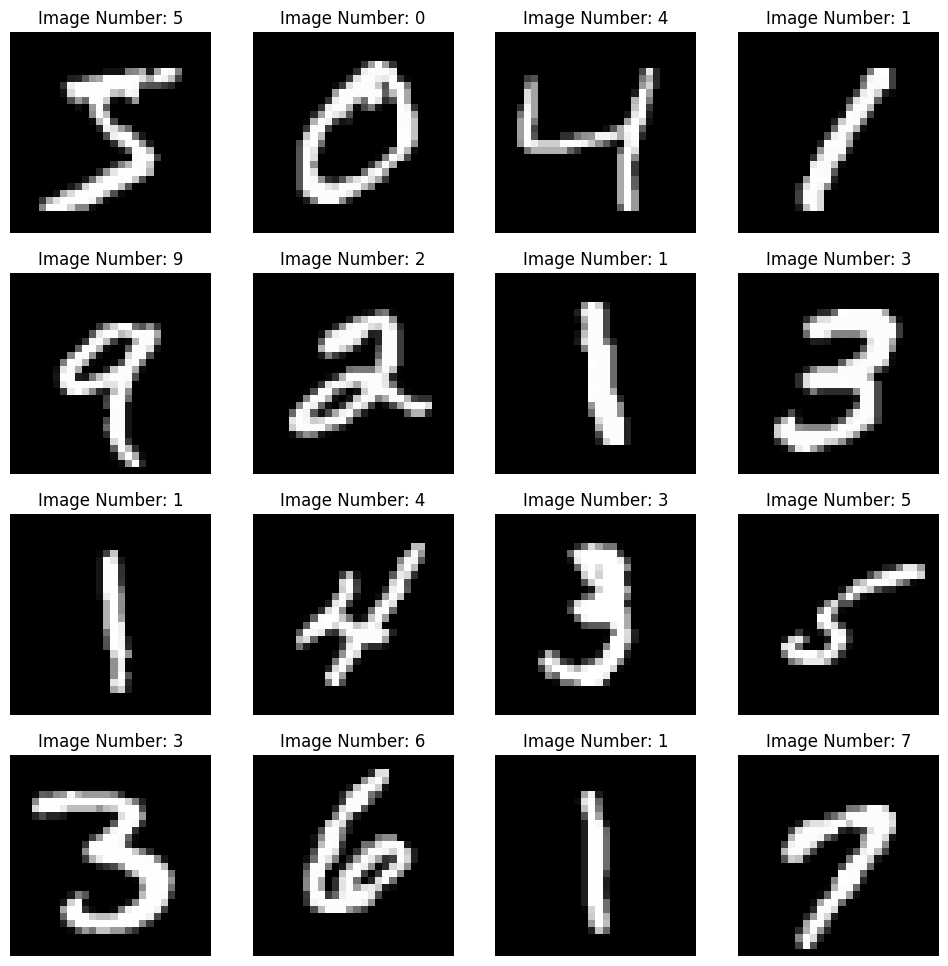

In [8]:
# Picking some random samples
random_integers = np.random.randint(1, mnist.data.shape[0], size=16)

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Image Number: {mnist.target[i]}")
    ax.axis('off')

plt.show()

### Plotting pie chart showing distribution of MNIST classes

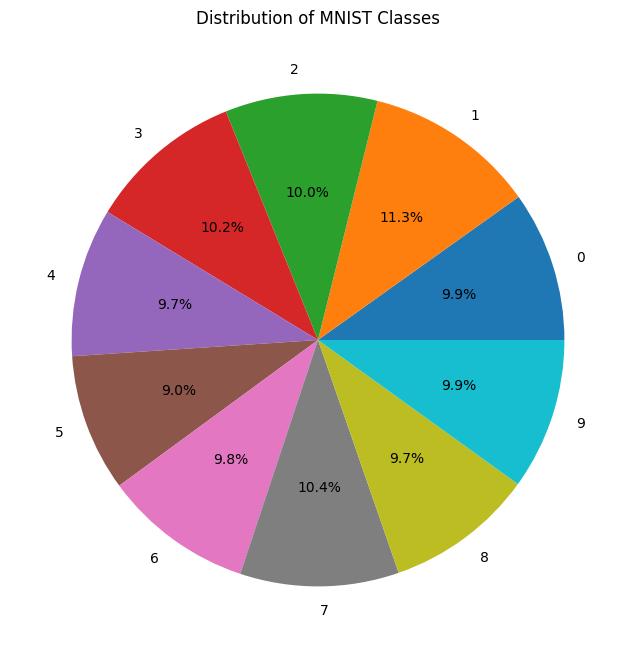

In [9]:
# Convert mnist.target to integer type
mnist.target = mnist.target.astype(np.int64)

# Count the occurrences of each class
class_counts = np.bincount(mnist.target)

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=np.arange(10), autopct='%1.1f%%')
plt.title('Distribution of MNIST Classes')
plt.show()

This pie chart shows distribution of different classes in MNIST data

## Data Preprocessing

Out taks requires us to choose the number of classes you want to have: anything between 3 to 10. I am going forward with all 10 available classes instead of picking lower classes. It will be requiring highter coumputing power as compared to picking 3 classes for example.

There are other ways to split the classes. Such as:
- Picking subset of existing data. [Only picking some of the features]
- Spliting in Odd even [Although for this task we need more than 2 taks]
- Taking non 0 target in set of 3. [Have to transform dataset]
- Set of 2 consecutive targets giving us 5 classes [Have to transform dataset]

In [10]:
X = mnist.data
Y = mnist.target

#### Splitting into train, validation and test samples

We will split data in train, validation and testing samples in ration 70:15:15 resp. We will train model with training dataset, use validation samples to evaluate model perfomrmance and test data to test model.

In [11]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state= 40)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, stratify=Y_temp, random_state= 40)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((49000, 784), (49000,), (10500, 784), (10500,), (10500, 784), (10500,))

Here we have use startify=Y and stratify = Y_temp to make sure created samples have equal distribution of independent variables

## Creating a Classifier Model

For the perpose of this lab we will be picking SVC model from Kaggle: [MNIST-Simple-ML](https://www.kaggle.com/code/metamadyeth/mnist-simple-ml)

In [12]:
# Creating SVC Model
classifier = SVC()
# Fitting data to model
classifier.fit(X_train, Y_train)

SVC()

#### Reason for picking SVC over SVM

Both SVM and SVC are good at accurately classifying data, especially when it's easy to tell classes apart. SVC is a bit faster for classification tasks because it's made just for that.

## Evaluation of Classifier

In [13]:
# Predicting output for all validation values
Y_pred = classifier.predict(X_val)

In [14]:
# Checking prediction for first 10 values
Y_pred[:10], Y_val[:10]

(array([0, 6, 8, 0, 0, 7, 5, 3, 1, 5], dtype=int64),
 array([0, 6, 8, 0, 0, 7, 5, 8, 1, 5], dtype=int64))

> It can be seen that out model got 9/10 values right. That means it is 90% accurate and is a good model for out current usecase. Let's check it's performance further.

### Checking classifier's performance

#### Accuracy of classifier

In [15]:
accuracy = accuracy_score(Y_val, Y_pred)
print("Accuracy of classifier:", accuracy)

Accuracy of classifier: 0.9771428571428571


#### Confusion matrix

<Axes: >

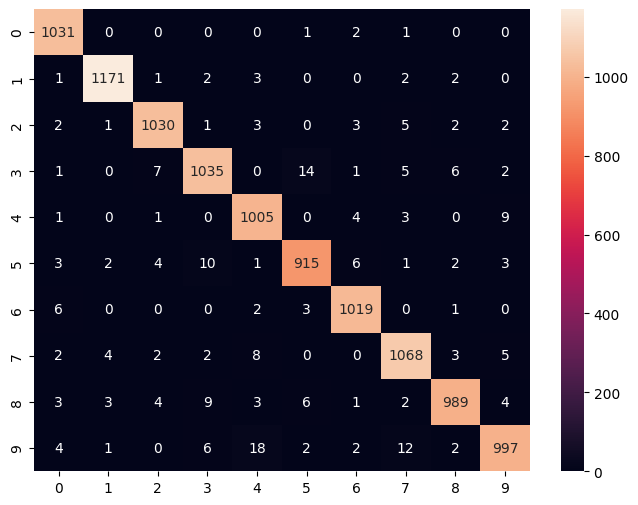

In [16]:
# Creating a confusion matrix
pred_cf_mat = confusion_matrix(Y_val, Y_pred)

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pred_cf_mat, annot=True, fmt="d",
            xticklabels=np.unique(Y_val), yticklabels=np.unique(Y_val))

#### Precision, recall and F1 for each class of Validation Set

In [17]:
clf_report = classification_report(Y_val, Y_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1035
           1       0.99      0.99      0.99      1182
           2       0.98      0.98      0.98      1049
           3       0.97      0.97      0.97      1071
           4       0.96      0.98      0.97      1023
           5       0.97      0.97      0.97       947
           6       0.98      0.99      0.99      1031
           7       0.97      0.98      0.97      1094
           8       0.98      0.97      0.97      1024
           9       0.98      0.95      0.97      1044

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



## Precision-recall curve for one class of your choice vs. all other

> I'll be picking class 5

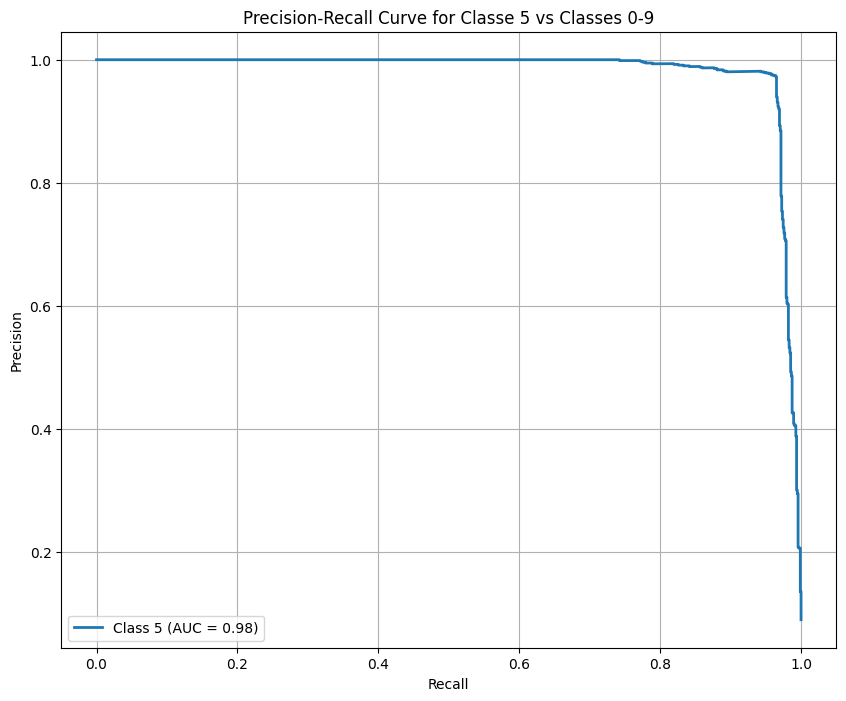

In [18]:
# convert the labels into binary for the precision-recall curve
Y_val_bin = label_binarize(Y_val, classes=range(10))

# Initialize the figure
plt.figure(figsize=(10, 8))

# Loop over each class and plot the precision-recall curve
precision, recall, _ = precision_recall_curve(Y_val_bin[:, 5], classifier.decision_function(X_val)[:, 5])
area_under_curve = auc(recall, precision)
    
# Plot the precision-recall curve for each class
plt.plot(recall, precision, label=f'Class {5} (AUC = {area_under_curve:.2f})', linewidth=2)

# Add plot styling
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classe 5 vs Classes 0-9')
plt.grid(True)
plt.legend(loc='best')

# Show the plot
plt.show()

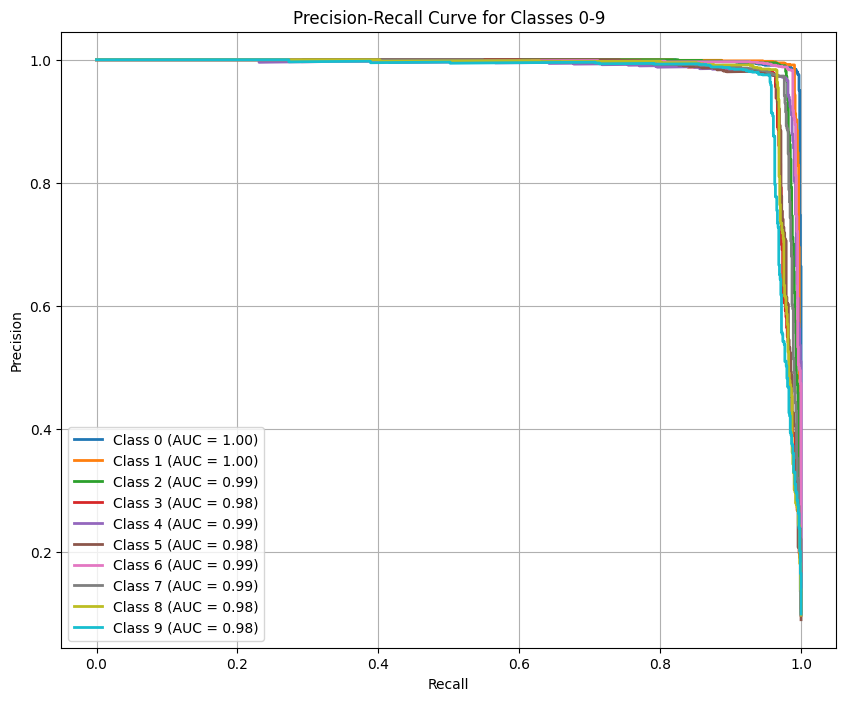

In [19]:
# convert the labels into binary for the precision-recall curve
Y_val_bi = label_binarize(Y_val, classes=range(10))

# Initialize the figure
plt.figure(figsize=(10, 8))

# Loop over each class and plot the precision-recall curve
for idx in range(10):
    precision, recall, _ = precision_recall_curve(Y_val_bin[:, idx], classifier.decision_function(X_val)[:, idx])
    area_under_curve = auc(recall, precision)
    
    # Plot the precision-recall curve for each class
    plt.plot(recall, precision, label=f'Class {idx} (AUC = {area_under_curve:.2f})', linewidth=2)

# Add plot styling
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classes 0-9')
plt.grid(True)
plt.legend(loc='best')

# Show the plot
plt.show()

### Classifier insight for validation data

- The data represents the performance of a classification model on a validation set, with each row corresponding to a label 0-9 and columns displaying metrics like precision, recall, and F1-score.
- Overall, the classifier demonstrates high performance, with consistently high scores across the board.
- Digits like 0, 1, and 6 exhibit near-perfect identification, with precision and recall scores close to 1, indicating the model rarely misclassifies these digits and captures most instances of them in the data.
- Some digits have slightly lower scores, suggesting the model's performance is slightly less perfect for these digits compared to others.
- The overall accuracy of the model is 98%, indicating it correctly identifies the vast majority of digits, showcasing its effectiveness in recognizing handwritten digits.

### Increasing precision and recall of choosen class without retraining the model

To increase precision for a chosen class without retraining the model, you can adjust the decision threshold for class prediction. By increasing the threshold, you'll be more conservative in classifying samples as belonging to the positive class, which can lead to higher precision. Let's demonstrate this with a numeric Python example using the validation data and the model.

In [20]:
# Assuming you want to adjust the decision threshold for class 5
class_index = 5

# Get the predicted probabilities for each class
Y_pred_prob = classifier.decision_function(X_val)

# Adjust the decision threshold
new_threshold = 0.7
Y_pred_class_5_new = (Y_pred_prob[:, class_index] > new_threshold).astype(int)

# Evaluate the new predictions
new_precision = precision_score(Y_val == class_index, Y_pred_class_5_new)
new_recall = recall_score(Y_val == class_index, Y_pred_class_5_new)

print("New Precision:", new_precision)
print("New Recall:", new_recall)

New Precision: 0.09072619275723319
New Recall: 1.0


To increase recall for a chosen class without retraining, you can decrease the decision threshold. This will lead to more positive predictions, potentially increasing recall at the cost of precision. Here's how you can adjust the decision threshold for your SVM classifier:

In [21]:
# Assuming you want to adjust the decision threshold for class 7
class_index = 7

# Get the predicted probabilities for each class
Y_pred_prob = classifier.decision_function(X_val)

# Adjust the decision threshold
new_threshold = 0.3
Y_pred_class_7_new = (Y_pred_prob[:, class_index] > new_threshold).astype(int)

# Evaluate the new predictions
new_precision = precision_score(Y_val == class_index, Y_pred_class_7_new)
new_recall = recall_score(Y_val == class_index, Y_pred_class_7_new)

print("New Precision:", new_precision)
print("New Recall:", new_recall)

New Precision: 0.11574269995768091
New Recall: 1.0


#### Testing on test data

In [22]:
Y_test_pred = classifier.predict(X_test)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("\nAccuracy on test data:", test_accuracy)


Accuracy on test data: 0.9775238095238096


In [23]:
clf_report_test = classification_report(Y_test, Y_test_pred)
print("\nClassification Report on test data:\n", clf_report_test)


Classification Report on test data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1036
           1       0.99      0.99      0.99      1181
           2       0.97      0.97      0.97      1048
           3       0.97      0.96      0.97      1071
           4       0.98      0.99      0.98      1024
           5       0.98      0.97      0.98       947
           6       0.98      0.99      0.98      1032
           7       0.97      0.98      0.97      1094
           8       0.97      0.97      0.97      1024
           9       0.97      0.96      0.97      1043

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



#### Classifier model insight 

The SVC classifier model's performance was evaluated on two datasets: one for validation set(X_val) and another for test set (X_test). In both cases, it achieved an  98% accuracy, showcasing its consistency in recognizing various handwritten digits. It's really good at recognizing most numbers, like 0, 1, and 6, almost every time. Although there were slight differences in performance across some digits between the two sets, overall, the model's reliability remains evident. It's like demonstrating the model's ability to perform good in recognizing different handwriting styles regardless of the dataset.